# Project 3 - Coupled Oscillators
By Mike Blanchard and Reilly Kobbe

Date: April 1, 2022

Professor: Dr. Titus

Description: In this project, we designed a system that uses coupled oscillators. In class, we investigated osculators that were free on both ends. For our project, we wanted to see the effects a fixed left end had on the eigenvalues, our graph, and our model for each mode. We were able to test different parameters and draw conclusions on the different models.

The original goal of this assignment was to model violin strings as the ball acted as the point where the string was plucked. We then saw the waves which came from that pluck. We now are modeling a more complex system which uses a fixed side. 

We learned previously that if one atom (or ball) is connected to a spring on each side than the rate of change of momentum in that atom is proportional to the difference in the length of the two springs which are attached. This is defined as the Momentum Principle.


# Momentum Principle 

The Momentum Principle is how we measure moving objects. It is defined as the total movement between two objects in a system based on the change of momentum after collision. It can be modeled through the equations below.


$$\begin{align*}
\frac{d\vec{p}}{dt} & = \vec{F}_{net}\\
\frac{d\vec{p}}{dt} & = \vec{F}_{1} + \vec{F}_2 \\
\frac{d\vec{p}}{dt} & = -k_ss_1\hat{L}_1 + -k_ss_2\hat{L}_2 \\
\frac{d\vec{p}}{dt} & = -k_ss_1\langle 1, 0, 0 \rangle + -k_ss_2\langle -1, 0, 0 \rangle \\
\frac{d\vec{p}}{dt} & = -k_s(L_1-L_0)\langle 1, 0, 0 \rangle + -k_s(L_2-L_0)\langle -1, 0, 0 \rangle \\
%\frac{d\vec{p}}{dt} & = -k_s(L_1-L_0 -L_2 + L_0)\langle 1, 0, 0 \rangle \\
\frac{d\vec{p}}{dt} & = -k_s(L_1 -L_2)\langle 1, 0, 0 \rangle 
\end{align*}$$

# Boundaries of the Springs

When we have three balls that are connected by four springs withtwo solid walls as the boundries their ODE's of the three masses would be: 

$$m_1\ddot{u}_1 = -ku_1-k(u_1-u_2)=-2ku_1+ku_2$$

$$m_2\ddot{u}_2 = -k(u_2-u_1)-k(u_2-u_3)=ku_1-2ku_2+ku_3$$

$$m_3\ddot{u}_3 = -k(u_3-u_2)-ku_3=ku_2-2ku_3$$



In [9]:
import numpy as np
import matplotlib.pyplot as plt

#animate with vpython
from vpython import * #watch out for namespace conflicts

# calculate eigenvalues and eigenvectors
from scipy.linalg import eigh

# print to markdown
from IPython.display import display, Markdown, Latex

# Initial Values

Here we declared our initial values. We declared initial variables for the strings and divided those numbers by the amount of masses (balls) to get the initial properties for each ball. Our length of the rod was split up into 3 variable; -L/2 was the leftmost point, L0 which was the middle, and L/2 which was the rightmost point. This was necessary in order to plot our function.

Additionally, in order to find our eigenvalues and eigenvectors we needed to load data into a matrix. For this project, we had to leave two lines out to account for our fixed left side. Essentially, each piece of the matrix was assigned a k value. We learned k was impacted from big K, the stiffness of the rod, and N, the number of masses. We figured this out when we were originally testing our model. When we first ran the program, the balls were going way off the screen, so far, that it was very difficult to see. From this, we learned that to reduce how far the spring expands, we must increase the size of K.

In [10]:
#properties of the system
M = 12 #mass of string in kg
L = 10 #length of string in m
K = 15 #effective stiffness in N/m
N = 3 #number of masses

#properties of each mass
m = M/N
L0 = L/(N)
k = K*(N)

#initial conditions
ui = np.zeros(N) #initial displacement
ui[0] = 1 #displace first mass

#Build matrices
A=np.zeros((N,N))

for i in range(N):
    A[i,i] = 2*k
    if i==0:
        A[0,i+1]=-k
    elif i==N-1:
        A[i,i-1]=-k
    else:
        A[i,i-1]=-k
        A[i,i+1]=-k

B=m*np.identity(N)

#find eigenvalues and eigenvectors
lamb, a = eigh(A, B)        # eigenvalues and eigenvectors
omegas = np.sqrt(lamb)

print("\n frequencies (omega):", omegas)
print("\n eigenvectors are column vectors in:\n\n", a)

#calculate coefficients using initial conditions
C = np.linalg.solve(a,ui)
print("\n The coefficients based on initial conditions are: \n\n", C)

#build the general solution
h = 0.01
ttotal = 10
t = np.arange(0,ttotal,h)

u = np.zeros((len(t),N+1))
u[:,0] = np.transpose(t) #store time in first column, u_i in other columns

for i in range(N):
    for w in range(0,len(omegas)):
        u[:,i+1] = u[:,i+1] + C[w]*a[i,w]*np.cos(omegas[w]*t)

print("\n The positions of all masses at all times are: [t, u_1, u_2, ...] \n\n", u)


 frequencies (omega): [2.56711851 4.74341649 6.19757231]

 eigenvectors are column vectors in:

 [[ 2.50000000e-01 -3.53553391e-01 -2.50000000e-01]
 [ 3.53553391e-01  1.03708291e-16  3.53553391e-01]
 [ 2.50000000e-01  3.53553391e-01 -2.50000000e-01]]

 The coefficients based on initial conditions are: 

 [ 1.         -1.41421356 -1.        ]

 The positions of all masses at all times are: [t, u_1, u_2, ...] 

 [[ 0.00000000e+00  1.00000000e+00  0.00000000e+00 -8.32667268e-17]
 [ 1.00000000e-02  9.98875264e-01  5.62289090e-04  5.27225107e-08]
 [ 2.00000000e-02  9.95504217e-01  2.24662677e-03  8.42990889e-07]
 ...
 [ 9.97000000e+00 -1.42997435e-01  1.38229295e-01  8.42928306e-01]
 [ 9.98000000e+00 -1.28282707e-01  1.15519442e-01  8.48606823e-01]
 [ 9.99000000e+00 -1.13149411e-01  9.33598056e-02  8.52506320e-01]]


# Comparing Our Frequencies, Eigenvectors, and Coefficients

If you run the above function, it will return the frequencies, eigenvectors, and coefficients for the normal modes. Before we compare the numbers to the free oscillators, I want to first explain what we learned about each of these terms.

First, the frequencies found represent how many times the balls oscillate within a certain time interval. In other words, it is how many times can the graph "peak" with a certain time interval. This is much easier to understand when you can see the peaks in our graphs.

Second, we discovered more information about eigenvectors. We learned that each column within the matrix used is an eigenvector. Additionally, each eigenvector is made up of three amplitudes of displacement of the masses of the balls.These are solved using functions with numpy.

Finally, the coefficients are based on the initial positions of the atoms at t=0. Each mass has a coefficient, and we use a numpy function to find these values.

Now, lets compare the fixed oscillations to our free oscillations. Here is what the free oscillations returned:
Frequencies (omega): 7.06985935e-09 7.07106781e-01 1.22474487e+00
Eigenvectors are column vectors in:
-2.88675135e-01 -3.53553391e-01 2.04124145e-01 -2.88675135e-01 3.79223850e-17 -4.08248290e-01 -2.88675135e-01 3.53553391e-01 2.04124145e-01
The coefficients based on initial conditions are:
2.88675135 3.53553391 -2.04124145

The first thing we noticed is how much smaller the "Free Model's" frequencies were. The biggest difference between the two models is that the tension is higher with one side fixed. After some testing of this, we learned that the more tension there is in the spring, the higher the frequencies are.

The second thing we noticed is how the eigenvectors are very different in some cases and almost the same in others. We are not sure why this is, however, our educated guess is that some balls get effected more severely than others. The middle ball appears to be acting the same way in both cases, while the left and rightmost balls have a larger difference.



In [11]:
def plotmode(mode):
    modeindex = mode-1
    h = 0.01
    ttotal = 20 #total time for calculations

    # array of times
    t = np.arange(0,ttotal,h)

    # build data array with all data; u[:,0] is time; other columns are u_i for each atom i
    u = np.zeros((int(ttotal/h), N+1))

    u[:,0] = np.transpose(t) #t.T

    for i in range(N):
        u_atom = a[i,modeindex]*np.cos(omegas[modeindex]*t)
        u[:,i+1] = np.transpose(u_atom)[:]

    # plot
    plt.figure(figsize=(12,8))
    plt.title("displacement of each atom")
    plt.xlabel("t (s)")
    plt.ylabel("$u_i$ (m)")
    for i in range(N): #plot each atom
        plt.plot(u[:,0], u[:,i+1], label="atom {:d}".format(i+1))
    plt.grid()
    plt.legend()
    plt.show()
    
    return u

## Animation 

The animation allows us to see the model in motion of the atoms within the springs. So what would it look like if those springs moved vertically, instead of horizontal? We decided to test this out and see what kind of solution was given using animate 2 as the vertical solution. Animate 1 is the horizonal solution  


In [12]:
def animate(u):
    
    scene=canvas()
    
    scene.width=1000
    
    R=L0/10
    R2=R/4
    
    scene.background=color.white 
    scene.fov=0.1
    
    thick = L0/20
    height = L0/2
    
    balls=[]
    
    springs=[]

    Lwall = box(pos = vec(-L/2, 0, 0), size = vec(thick, L/10, L/10), color=color.white)
    spring = helix(pos=Lwall.pos, axis=vec(L0,0,0), color=color.red, radius=R)
    springs.append(spring)
    
    ball = sphere(pos=Lwall.pos+vector(L0,0,0), radius=R, color=color.orange)
    ball.eqx = ball.pos.x
    balls.append(ball)
    
    for i in range(N-1):
        spring = helix(pos=balls[-1].pos, axis=vec(L0,0,0), color=color.red, radius=R)
        springs.append(spring)
        ball = sphere(pos=spring.pos+spring.axis, radius=R, color=color.orange)
        ball.eqx = ball.pos.x
        balls.append(ball)
    
    #animate
    scene.pause()
    t=0
    for n in range(len(u[:,0])):
        rate(100)
        for i in range(len(balls)):
            ball = balls[i]
            ball.pos.x = ball.eqx + u[n,i+1]
        for i in range(1,len(springs)):
            sp = springs[i]
            sp.pos = balls[i-1].pos
            sp.axis = balls[i].pos-sp.pos
        springs[0].axis = balls[0].pos - springs[0].pos

In [13]:
def animate2(u):
    
    scene=canvas()
    
    scene.width=1000
    
    R=L0/10
    R2=R/4
    
    scene.background=color.white 
    scene.fov=0.1
    
    thick = L0/20
    height = L0/2
    
    balls=[]
    
    springs=[]

    Lwall = box(pos = vec(-L/2, 0, 0), size = vec(thick, L/10, L/10), color=color.white)
    spring = helix(pos=Lwall.pos, axis=vec(L0,0,0), color=color.red, radius=R)
    springs.append(spring)
    
    ball = sphere(pos=Lwall.pos+vector(L0,0,0), radius=R, color=color.orange)
    ball.eqy = ball.pos.y
    balls.append(ball)
    
    for i in range(N-1):
        spring = helix(pos=balls[-1].pos, axis=vec(L0,0,0), color=color.red, radius=R)
        springs.append(spring)
        ball = sphere(pos=spring.pos+spring.axis, radius=R, color=color.orange)
        ball.eqy = ball.pos.y
        balls.append(ball)
    
    #animate
    scene.pause()
    t=0
    for n in range(len(u[:,0])):
        rate(100)
        for i in range(len(balls)):
            ball = balls[i]
            ball.pos.y = ball.eqy + u[n,i+1]
        for i in range(1,len(springs)):
            sp = springs[i]
            sp.pos = balls[i-1].pos
            sp.axis = balls[i].pos-sp.pos
        springs[0].axis = balls[0].pos - springs[0].pos

# Plotting with different modes 

Below we model the different modes between the three balls and springs. The modes passed between plotmode() allows us to see the difference between high frequency and low frequency. Since the different modes are superpositions of the general mode, we know that a combination of modes will lead us to the same values for each atom

When the modes and frequencies of the functions change we notice a large difference in the graphs they return. When the mode is set to 2, we notice that the second atom doesn’t seem to be moving but the first and third ball are moving.  


# Mode 1

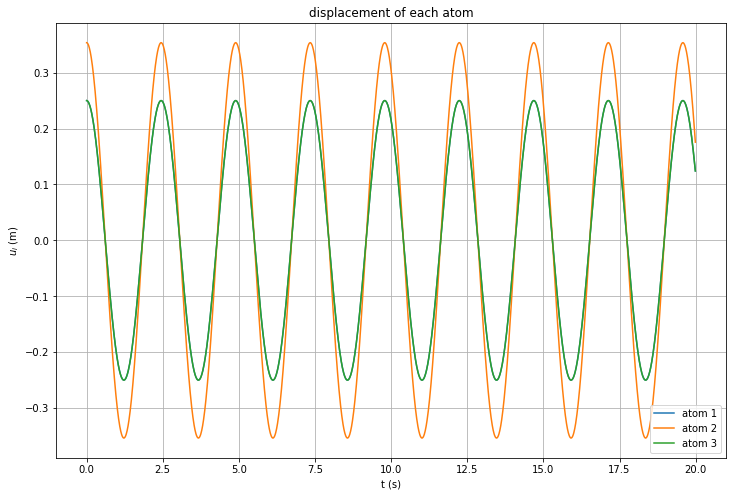

In [14]:
u = plotmode(1)

In [ ]:
animate(u)

In [ ]:
animate2(u)

# Mode 2

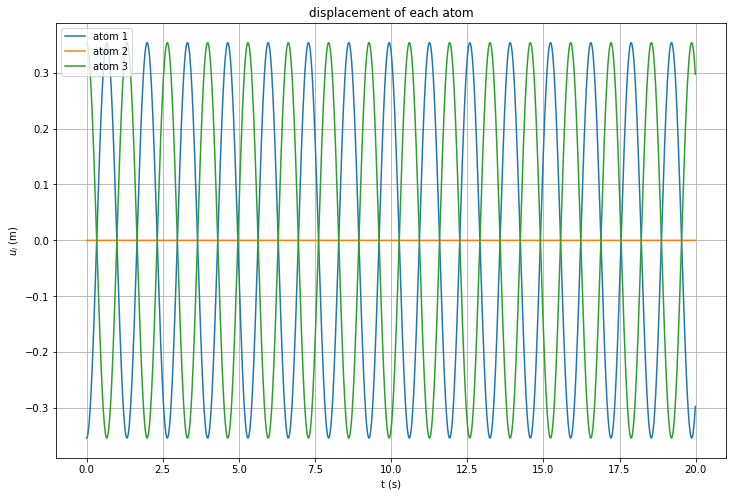

In [15]:
u = plotmode(2)

In [ ]:
animate(u)

In [ ]:
animate2(u)

# Mode 3


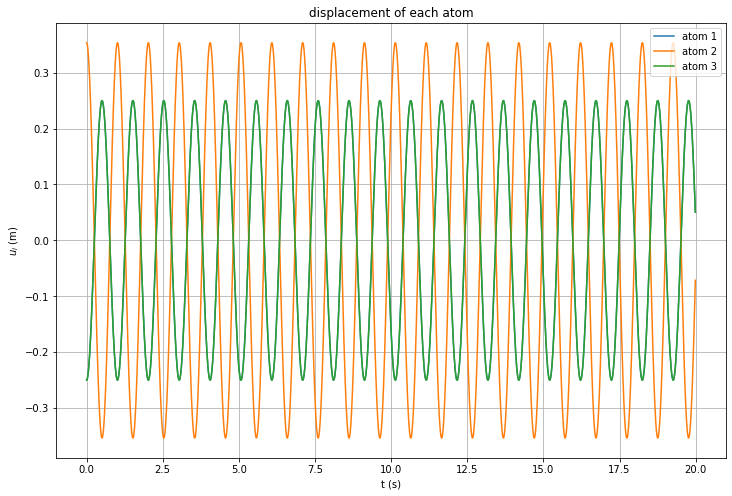

In [16]:
u = plotmode(3)

In [ ]:
animate(u)

In [ ]:
animate2(u)